<a href="https://colab.research.google.com/github/edusgr/EDP-II/blob/main/M%C3%89TODO_DE_GALERKIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Galerkin

Se resuelve el problema:

$$-u''(x) + u(x) - x = 0,\quad 0<x<1$$

con condiciones de frontera:

$$u(0)=u(1)=0$$

Usando el método de Galerkin con funciones base:

$$\beta_i(x)=\sin(i\pi x)$$

y una aproximación:

$$u_3(x)=\sum_{i=1}^3 \alpha_i\beta_i(x)$$

**Solución exacta**

Primero se obtiene la solución exacta del problema para poder comparar con la solución aproximada.

In [27]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Definimos los simbolos y
# la solucion de nuestrs EDO
# sujeta a las condiciones de frontera

x = sp.symbols('x')
u = sp.Function('u')

ode = -sp.diff(u(x), x, 2) + u(x) - x
sol = sp.dsolve(ode, u(x), ics={u(0): 0, u(1): 0})
u_exact = sp.simplify(sol.rhs)
u_exact # la nombramos solucion exacta

(x*(1 - exp(2))*exp(x) + exp(2*x + 1) - E)*exp(-x)/(1 - exp(2))

**Aproximación usando el método de Galerkin**

Se propone una solución aproximada como combinación lineal de tres funciones, en este caso son funciones de seno.

In [29]:
# definimos las 3 funciones, y las escribimos
# como combinacion lineal (suma)

a1, a2, a3 = sp.symbols('a1 a2 a3')

beta1 = sp.sin(sp.pi*x)
beta2 = sp.sin(2*sp.pi*x)
beta3 = sp.sin(3*sp.pi*x)

u3 = a1*beta1 + a2*beta2 + a3*beta3
u3

a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x)

Se define el residuo y se imponen las condiciones de Galerkin.

In [30]:
# residuo e implementacion de
# el metodo de galerrkin

R = -sp.diff(u3, x, 2) + u3 - x

eq1 = sp.integrate(R*beta1, (x, 0, 1))
eq2 = sp.integrate(R*beta2, (x, 0, 1))
eq3 = sp.integrate(R*beta3, (x, 0, 1))

sol_alpha = sp.solve([eq1, eq2, eq3], [a1, a2, a3])
sol_alpha

{a1: 2/(pi + pi**3), a2: -1/(pi + 4*pi**3), a3: 2/(3*pi + 27*pi**3)}

Sustituyendo los coeficientes obtenidos en la aproximación.

In [31]:
u_galerkin = u3.subs(sol_alpha)
sp.simplify(u_galerkin)

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

**Comparación gráfica**

Se comparan la solución analítica y la solución aproximada.

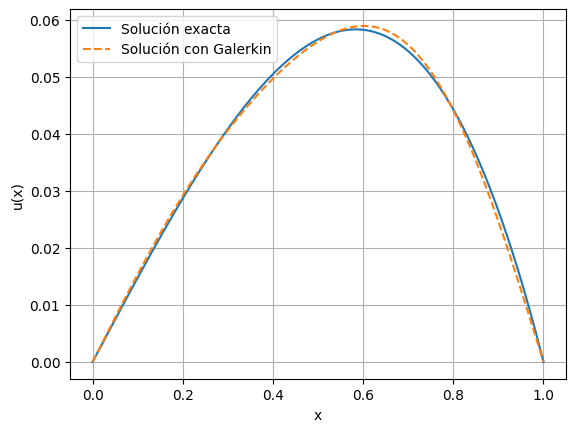

In [25]:
# veamos ambos metodos en el plano

u_exact_f = sp.lambdify(x, u_exact, 'numpy')
u_gal_f = sp.lambdify(x, u_galerkin, 'numpy')

xx = np.linspace(0, 1, 400)

plt.figure()
plt.plot(xx, u_exact_f(xx), label='Solución exacta')
plt.plot(xx, u_gal_f(xx), '--', label='Solución con Galerkin')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid()
plt.show()

**Error de la aproximación**

Se calcula el error máximo (norma infinita) y el error en norma $L^2$.


In [26]:
# Error e(x) = |u_exact(x) - u_galerkin(x)|
error = np.abs(u_exact_f(xx) - u_gal_f(xx))

# Norma infinito: el peor de los casos
error_inf = np.max(error)

# Norma L2: un promedio de los errores
error_L2 = np.sqrt(np.trapezoid(error**2, xx))

print("Error máximo:", error_inf)
print("Error con norma 2:", error_L2)


Error máximo: 0.00198231366907033
Error con norma 2: 0.0008441839170882415
